In [58]:
from copy import deepcopy

In [59]:
from pam.read import read_matsim
from pam.core import Population, Household, Person
from pam.activity import Plan, Activity, Leg
from pam.utils import minutes_to_datetime as mtdt, matsim_duration_to_hours
from pam.variables import END_OF_DAY
%matplotlib inline

In [60]:
from pam.scoring import CharyparNagelPlanScorer

default_config = {
    'mUM': 1,
    'utilityOfLineSwitch': -1,
    'performing': 6,
    'waiting': 0,
    'waitingPt': -2,
    'lateArrival': -18,
    'earlyDeparture': -0,
    'work': {
        'typicalDuration': '08:30:00',
        # 'openingTime': '06:00:00',
        # 'closingTime': '20:00:00',
        # 'latestStartTime': '09:30:00',
        # 'earliestEndTime': '16:00:00',
        "minimalDuration": "08:00:00"
        },
    'home': {
        'typicalDuration': '12:00:00',
        "minimalDuration": "08:00:00"
        },
    'shop': {
        'typicalDuration': '00:30:00',
        "minimalDuration": "00:10:00"
        },
    'education': {
        'typicalDuration': '08:30:00',
        "minimalDuration": "06:00:00"
        },
    'car': {
        # 'constant': -0,
        # 'dailyMonetaryConstant': -0,
        # 'dailyUtilityConstant': -0,
        # 'marginalUtilityOfDistance': -0,
        'marginalUtilityOfTravelling': -5,
        'monetaryDistanceRate': -0.0005
        },
    'pt': {
        'marginalUtilityOfTravelling': -5,
        'monetaryDistanceRate': -0.001
        },
    'bus': {
        'marginalUtilityOfTravelling': -5,
        'monetaryDistanceRate': -0.001
        },
    'train': {
        'marginalUtilityOfTravelling': -5,
        'monetaryDistanceRate': -0.001
        },
    'walk': {
        'marginalUtilityOfTravelling': -12,
        },
    'bike': {
        'marginalUtilityOfTravelling': -12,
        }
    }

config = {subpop: default_config for subpop in [
    "default", "high income", "medium income", "low income", "freight"
    ]}

scorer = CharyparNagelPlanScorer(cnfg=config)

# Toy Data

In [61]:
default_config = {
    'mUM': 1,
    'utilityOfLineSwitch': -1,
    'performing': 6,
    'waiting': -1,
    'waitingPt': -2,
    'lateArrival': -18,
    'earlyDeparture': -6,
    'work': {
        'typicalDuration': '08:30:00',
        'openingTime': '06:00:00',
        'closingTime': '20:00:00',
        'latestStartTime': '09:30:00',
        'earliestEndTime': '16:00:00',
        "minimalDuration": "08:00:00"
        },
    'home': {
        'typicalDuration': '09:00:00',
        "minimalDuration": "06:00:00",
        'earliestEndTime': '06:00:00',
        },
    'shop': {
        'openingTime': '06:00:00',
        'closingTime': '20:00:00',
        'typicalDuration': '00:30:00',
        "minimalDuration": "00:30:00"
        },
    'education': {
        'openingTime': '09:00:00',
        'closingTime': '16:00:00',
        'typicalDuration': '07:00:00',
        "minimalDuration": "06:00:00",
        'latestStartTime': '09:00:00',
        'earliestEndTime': '15:30:00',
        },
    'car': {
        'constant': -5,
        'dailyMonetaryConstant': -0,
        'dailyUtilityConstant': -0,
        'marginalUtilityOfDistance': -0,
        'marginalUtilityOfTravelling': -0,
        'monetaryDistanceRate': -0.0005
        },
    'bus': {
        'dailyMonetaryConstant': -5,
        'marginalUtilityOfTravelling': -5,
        'monetaryDistanceRate': -0.001
        },
    'train': {
        'dailyMonetaryConstant': -5,
        'marginalUtilityOfTravelling': -5,
        'monetaryDistanceRate': -0.001
        },
    'walk': {
        'marginalUtilityOfTravelling': -12,
        },
    'bike': {
        'marginalUtilityOfTravelling': -12,
        }
    }

config = {subpop: default_config for subpop in [
    "default"
    ]}

scorer = CharyparNagelPlanScorer(cnfg=config)

In [62]:
personA = Person('Ahmed', attributes={'age': 20, 'subpopulation': 'default'})
personA.plan.day = [
    Activity(act='home', area=1, start_time=mtdt(0), end_time=mtdt(420)),
    Leg(mode='car', start_area=1, end_area=2, start_time=mtdt(420), end_time=mtdt(480), distance=1000),
    Activity(act='shop', area=2, start_time=mtdt(480), end_time=mtdt(510)),
    Leg(mode='walk', start_area=2, end_area=3, start_time=mtdt(510), end_time=mtdt(570), distance=1000),
    Activity(act='work', area=3, start_time=mtdt(570), end_time=mtdt(960)),
    Leg(mode='car', start_area=3, end_area=1, start_time=mtdt(960), end_time=mtdt(1020), distance=1000),
    Activity(act='home', area=1, start_time=mtdt(1020), end_time=END_OF_DAY)
]

personB = Person('Brenda', attributes={'age': 20, 'subpopulation': 'default'})
personB.plan.day = [
    Activity(act='home', area=1, start_time=mtdt(0), end_time=mtdt(300)),
    Leg(mode='car', start_area=1, end_area=2, start_time=mtdt(300), end_time=mtdt(360), distance=1000),
    Activity(act='shop', area=2, start_time=mtdt(360), end_time=mtdt(420)),
    Leg(mode='walk', start_area=2, end_area=3, start_time=mtdt(420), end_time=mtdt(480), distance=1000),
    Activity(act='work', area=3, start_time=mtdt(480), end_time=mtdt(1320)),
    Leg(mode='car', start_area=3, end_area=1, start_time=mtdt(1320), end_time=mtdt(1380), distance=1000),
    Activity(act='home', area=1, start_time=mtdt(1380), end_time=END_OF_DAY)
]

personC = Person('Cookie', attributes={'age': 20, 'subpopulation': 'default'})
personC.plan.day = [
    Activity(act='home', area=1, start_time=mtdt(0), end_time=mtdt(120)),
    Leg(mode='car', start_area=1, end_area=2, start_time=mtdt(120), end_time=mtdt(180), distance=1000),
    Activity(act='shop', area=2, start_time=mtdt(180), end_time=mtdt(420)),
    Leg(mode='walk', start_area=2, end_area=3, start_time=mtdt(420), end_time=mtdt(480), distance=1000),
    Activity(act='work', area=3, start_time=mtdt(480), end_time=mtdt(1320)),
    Leg(mode='car', start_area=3, end_area=1, start_time=mtdt(1320), end_time=mtdt(1380), distance=1000),
    Activity(act='home', area=1, start_time=mtdt(1380), end_time=END_OF_DAY)
]

personA.validate()
personB.validate()
personC.validate()

True

Ahmed's score = 95.17750530673948
Brenda's score = 220.77119050471717
Cookie's score = 162.59537925482084


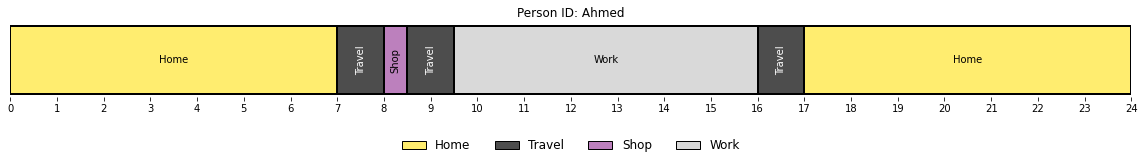

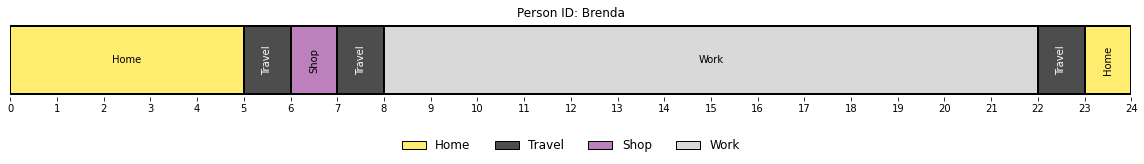

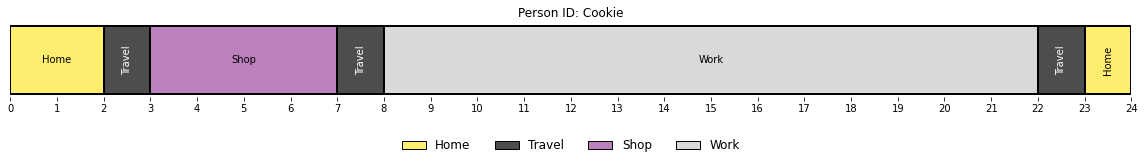

In [63]:
print(f"{personA.pid}'s score = {scorer.score_person(personA)}")
personA.plot()
print(f"{personB.pid}'s score = {scorer.score_person(personB)}")
personB.plot()
print(f"{personC.pid}'s score = {scorer.score_person(personC)}")
personC.plot()

# Calibration

## Optimising utility score sans MATSim

Note that we are not messing with the sequence or the trips, or locations - so trips distances and times do not vary.

### Random Search for Optima

In [64]:
from matplotlib import pyplot as plt
from pam.optimise.random import reschedule
from pam.optimise.grid import grid_search

In [65]:
def optimise(plan):
    plan, log = reschedule(
        plan,
        plans_scorer=scorer,
        config=config['default'],
        patience=1000
        )
    # plt.plot(list(log.keys()), list(log.values()))
    return plan

In [66]:
plans = [personA.plan, personB.plan, personC.plan]
proposed = []
for plan in plans:
    proposed.append(optimise(plan))


Initial best score at iteration 0: 95.17750530673948
New best score at iteration 0: 104.40436522225369
New best score at iteration 1: 141.16733772588856
New best score at iteration 3: 157.16257137690377
New best score at iteration 5: 175.157403905086
New best score at iteration 12: 183.65859424718383
New best score at iteration 14: 189.31385140750146
New best score at iteration 15: 199.3806700299931
New best score at iteration 72: 213.671585928361
Initial best score at iteration 0: 220.77119050471717
Initial best score at iteration 0: 162.59537925482084
New best score at iteration 0: 170.30030878183663
New best score at iteration 1: 206.12108221456995
New best score at iteration 125: 210.27392439085193
New best score at iteration 203: 211.56367294431254
New best score at iteration 779: 212.52105937179502


In [67]:
from pam.array import encode, decode, distance

In [68]:
encode.plan_to_one_hot(
    plans[0],
    mapping = {"home":0, "travel":1, "shop":2, "work":3}
)

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [69]:
ranked = {}
for i, p in zip(plans, proposed):
    i_encoded = encode.plan_to_one_hot(
        i,
        mapping = {"home":0, "travel":1, "shop":2, "work":3},
        bin_size=900
    )
    p_encoded = encode.plan_to_one_hot(
        p,
        mapping = {"home":0, "travel":1, "shop":2, "work":3},
        bin_size=900
    )
    difference = distance.accuracy(i_encoded, p_encoded)
    ranked[difference] = i


In [70]:
ranked = dict(sorted(ranked.items()))

0.3541666666666667
0.6979166666666666
1.0


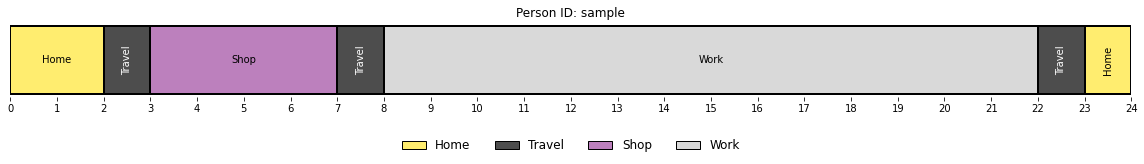

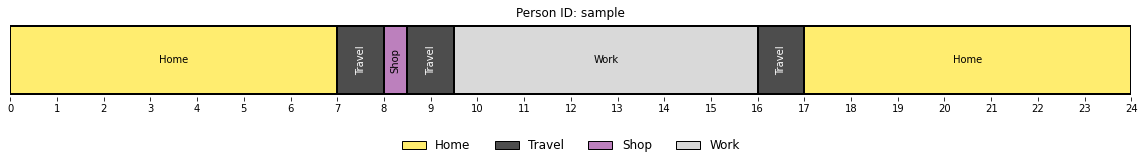

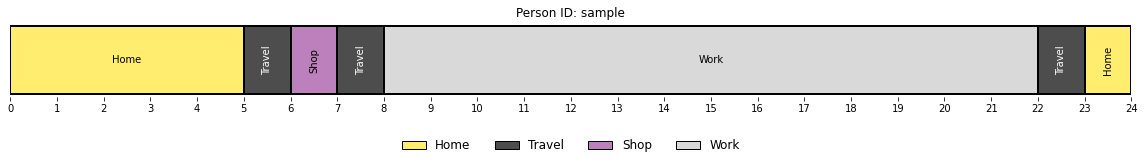

In [71]:
for score, plan in ranked.items():
    print(score)
    plan.plot()